# Object Oriented Programming (OOP): Creating a Financial Instrument Class

## An example Class: pandas.DataFrame
Goal: handling and manipulating any Tabular Data (efficiently)

In [1]:
import pandas as pd

## The FinancialInstrument
Goal: Analyzing Financial Instruments (e.g. stocks) efficiently

In [2]:
#pip install --upgrade yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

Note: you need __yfinance version 0.2.48 or higher__.

Check your currently installed version:

In [4]:
yf.__version__

'1.0'

You can upgrade with:

pip install --upgrade yfinance

In [5]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame() # new from yfinance 0.2.48
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Instantiation__

In [33]:
stock = FinancialInstrument(ticker = "PSKY", start = "2000-07-01", 
                            end =  "2025-12-31" ) # instantiation

[*********************100%***********************]  1 of 1 completed


In [34]:
stock

FinancialInstrument(ticker = PSKY, start = 2000-07-01, end = 2025-12-31)

In [35]:
type(stock)

__main__.FinancialInstrument

__Attributes__

In [36]:
#stock.

In [37]:
stock.ticker

'PSKY'

In [38]:
stock.start

'2000-07-01'

In [39]:
stock.end

'2025-12-31'

In [40]:
stock.data

,price,log_returns
Date,,
2005-12-05,16.899969,NaN
2005-12-06,16.304995,-0.035840
2005-12-07,16.172075,-0.008185
2005-12-08,16.070797,-0.006282
2005-12-09,16.222706,0.009408
...,...,...
2025-12-19,13.050000,0.003070
2025-12-22,13.610000,0.042017
2025-12-23,13.530000,-0.005895


__Methods__

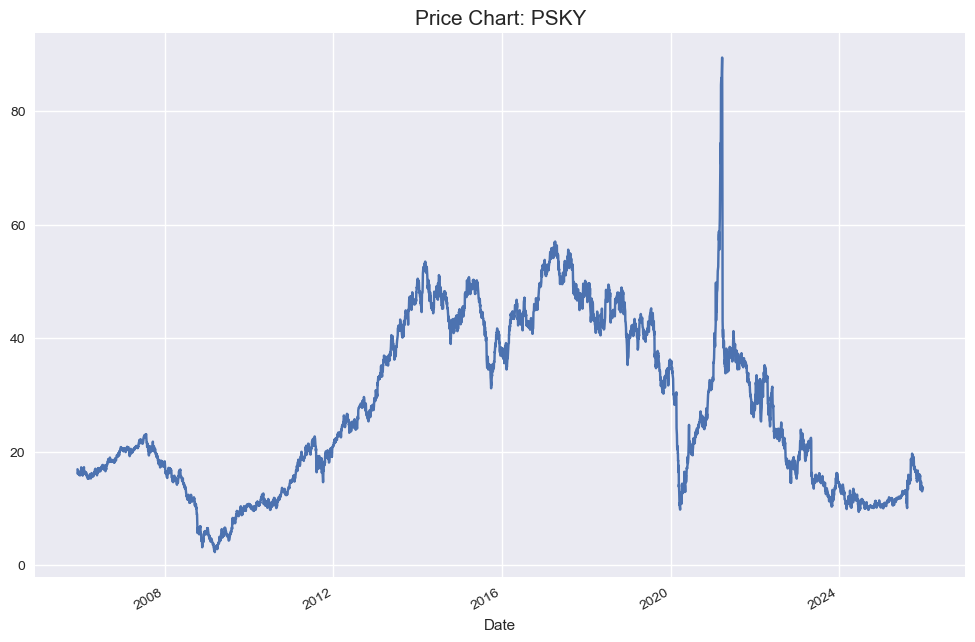

In [41]:
stock.plot_prices()

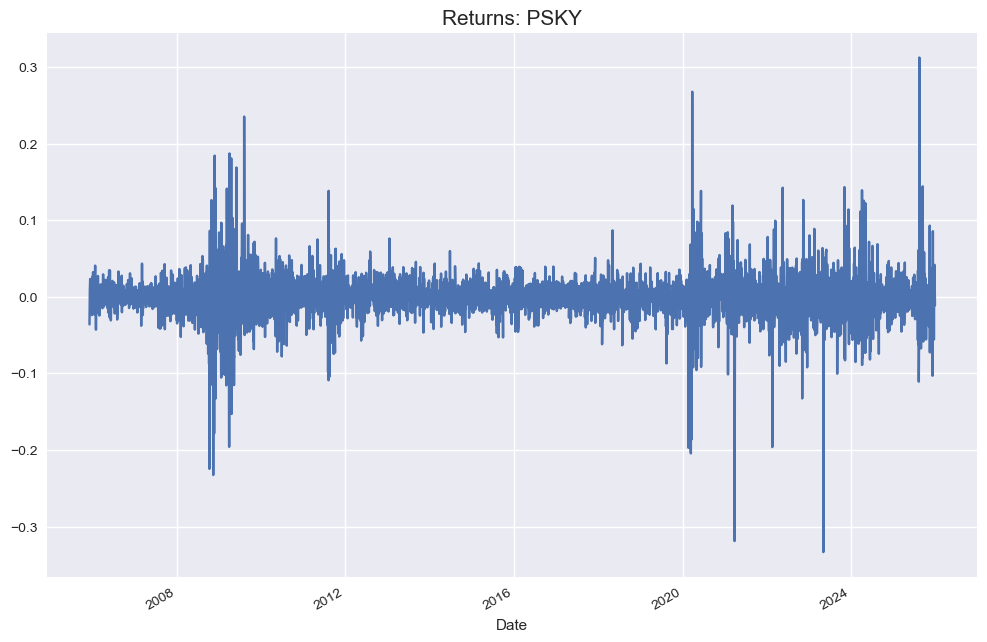

In [42]:
stock.plot_returns()

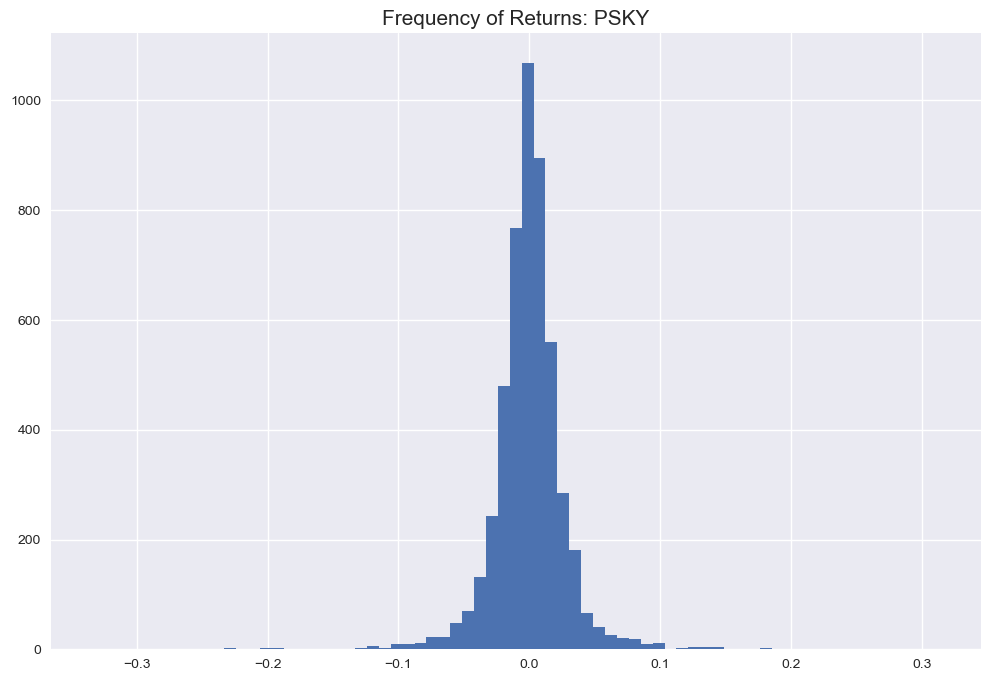

In [43]:
stock.plot_returns(kind = "hist")

__More Methods__

In [44]:
stock.mean_return()

np.float64(-4.319808842455753e-05)

In [45]:
stock.data.log_returns.mean()

np.float64(-4.319808842455753e-05)

In [46]:
stock.mean_return(freq = "W") # NEW - replace w by W

np.float64(-0.0001692902644905831)

In [47]:
stock.std_returns()

0.029089506650799474

In [48]:
stock.std_returns(freq = "W") # NEW - replace w by W

0.06617190104850477

In [49]:
stock.annualized_perf()

Return: -0.011 | Risk: 0.462


In [50]:
stock.set_ticker("WBD")

[*********************100%***********************]  1 of 1 completed


In [51]:
stock.ticker

'WBD'

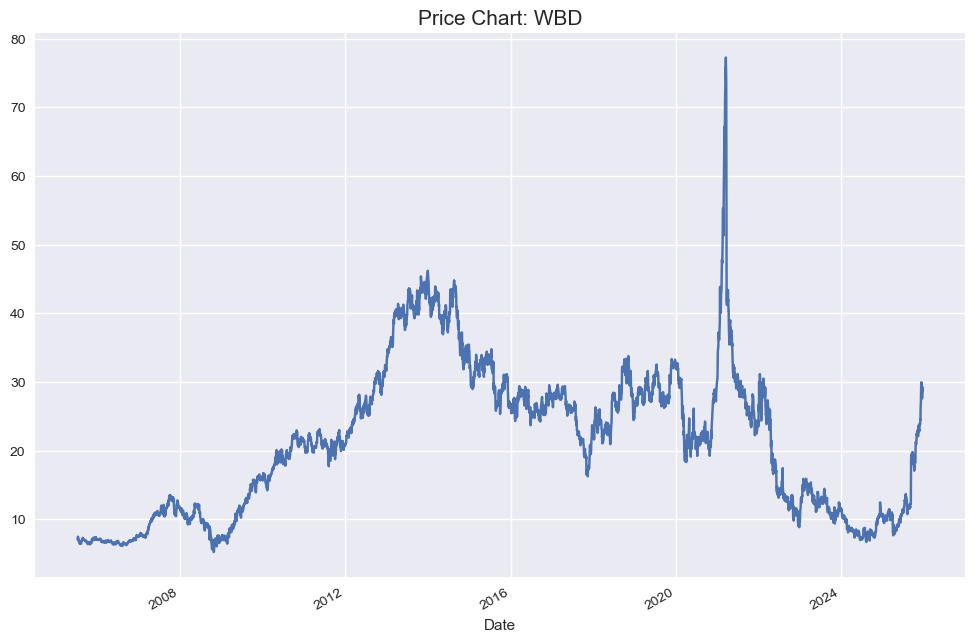

In [52]:
stock.plot_prices()

In [53]:
stock.annualized_perf()

Return: 0.069 | Risk: 0.413
